# Lab 3 Pre-Lab: Neural Networks & Computer Vision Basics

You are NOT allowed to import any other libraries in this notebook otherwise points will be deducted. If you need to please confirm with the TA.
`''' TODO '''` Indicates where your solution code should go. Please ensure code is readable easily.


## 1. Simple Neural Network

For this task, you'll implement a rudimentary neural network with one hidden layer.

**Network Architecture:**

- **Input Layer:**
   - 3 neurons
- **Hidden Layer:**
   - 6 neurons
   - Weight matrix `W1` and bias vector `b1`
   - Activation: ReLU
- **Output Layer:**
   - 4 neurons
   - Weight matrix `W2` and bias vector `b2`
   - Activation: Sigmoid

**Tasks:**

1. **Activation Function:**
   - Implement the ReLU and sigmoid activation functions manually, without using external libraries for this purpose.

      ReLU: 
      $$ \text{ReLU}(z) = \max(0, z) $$

      Sigmoid: 
      $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

2. **Initialization:**
   - Create an input vector `X` with 3 random values between 0 and 1.
   - Based on the network architecture, initialize the weight matrices `W1` and `W2` with random values between 0 and 1.
   - Similarly, initialize the bias vectors `b1` and `b2` with random values between 0 and 1.

   You can use `np.random.rand()`

3. **Forward Pass:**
   - Using the initialized values and considering the specified network architecture, perform the forward pass through the network. Make sure to:
     - Compute the activations for the hidden layer.
     - Apply the ReLU activation function.
     - Compute the activations for the output layer.
     - Apply the sigmoid activation function to get the final output.

4. **Display the Result:**
   - Print the final output from the neural network.

**Note:**
Ensure the matrices' shapes are compatible throughout the network. Do not use external libraries for the forward pass. You are not allowed to import any other libraries.


In [3]:
import numpy as np
np.random.seed(42) # Do not modify

# Activation Functions
def relu(z):
    #''' TODO '''
    return np.maximum(0,z)

def sigmoid(z):
    #''' TODO '''
    y = (1.0) / (1.0 + np.exp(-z))
    return y

# 1. Initialization
X = np.random.rand(3)
W1 = np.random.rand(3,6)
W2 = np.random.rand(6,4)
b1 = np.random.rand(6)
b2 = np.random.rand(4)

# 2. Forward Pass
A1 = np.dot(X, W1) + b1
A3 = relu(A1)
A4 = np.dot(A3, W2) + b2
A2 = sigmoid(A4)

# 3. Display the Result
print("Final Output A2:")
print(A2)


Final Output A2:
[0.98462485 0.99340692 0.99618285 0.95022235]


## 2. Image Manipulations

You will be working with and manipulating `messi.jpeg` which is found in your repos.

**Tasks:**

1. **Image Display:**
   Load image`'messi.jpeg'` using PIL. Display the loaded image using matplotlib. You may find `open()` from PIL and `imshow()` from matplotlib useful.

2. **Image to Numpy Array:**
   Convert the image into a NumPy array and print its shape.

3. **Color Channels:**
   Split the image into its R, G, B channels and display each channel separately.

4. **Grayscale Conversion:**
   Convert the image to grayscale and display the grayscale image.

5. **Image Normalization:**
   Normalize the grayscale image such that values are in the range [0,1]. Print the minimum and maximum values before and after normalization.

6. **Image Crop:**
   Extract a center crop of 500x500 from the grayscale image and display the resized image.

7. **Convolution with Sobel Kernel:**
Manually apply convolution (do not use built-in functions like `numpy.convolve` or `scipy.signal.convolve2d`) to the cropped 500x500 image using the Sobel kernel provided below. Display the convoluted image.
   
   Sobel kernel:
   `[[-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]]`



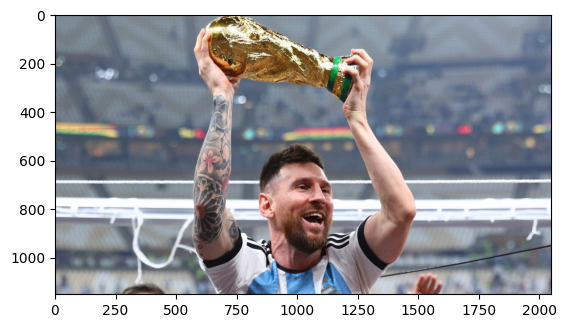

(1152, 2048, 3)


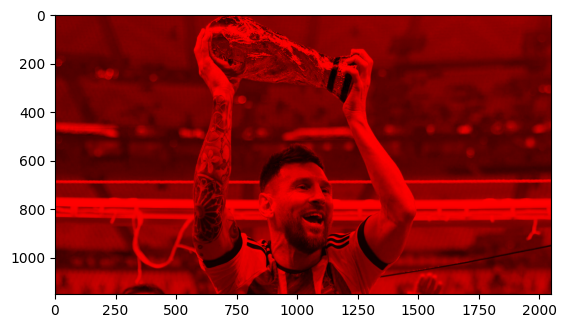

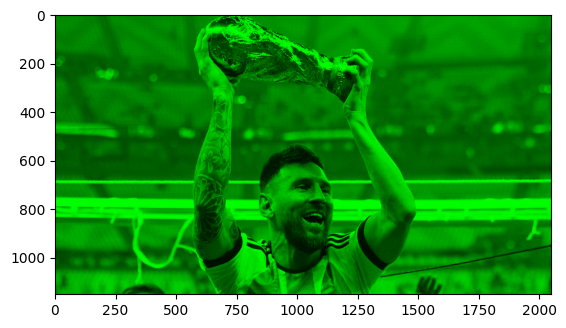

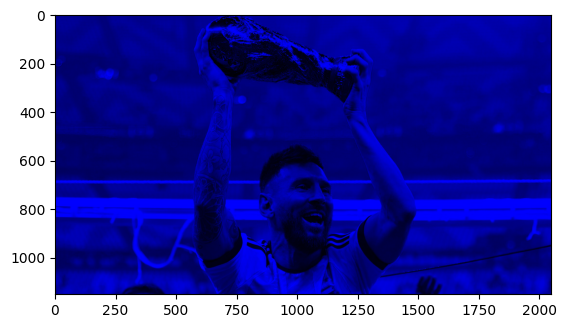

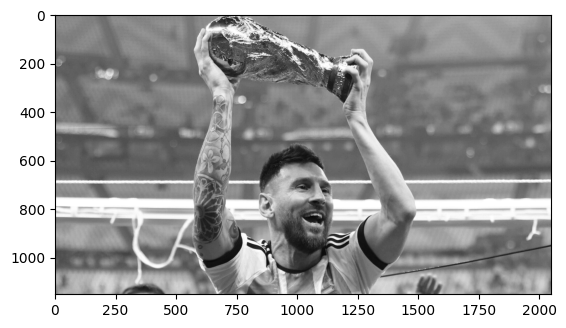

Minimum value before normalization: 0.0
Maximum value before normalization: 255.0
Minimum value after normalization: 0.0
Maximum value after normalization: 1.0


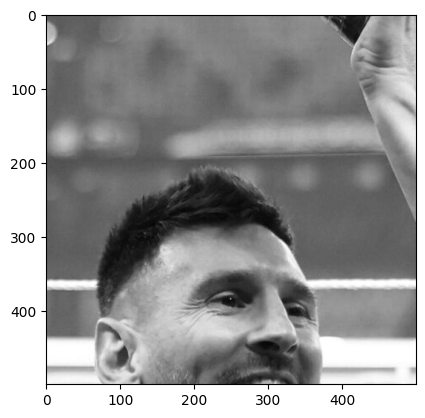

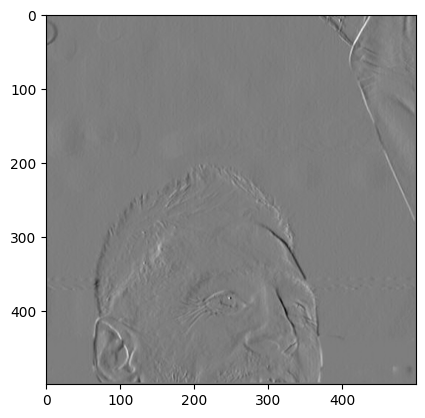

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 1. Load the image using PIL & Display
#''' TODO '''
image = Image.open("messi.jpeg")
plt.imshow(image)
plt.show()

# 2. Image to Numpy Array
#''' TODO '''
image_array = np.array(image)
print(image_array.shape)

# 3. Color Channels
#''' TODO '''
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

red_image = np.zeros_like(image_array)
green_image = np.zeros_like(image_array)
blue_image = np.zeros_like(image_array)

red_image[:, :, 0] = red_channel
green_image[:, :, 1] = green_channel
blue_image[:, :, 2] = blue_channel

plt.imshow(red_image)
plt.show()

plt.imshow(green_image)
plt.show()

plt.imshow(blue_image)
plt.show()

# 4. Grayscale Conversion
#''' TODO '''
grayscale_image = np.mean(image_array, axis=2)
plt.imshow(grayscale_image, cmap='gray')
plt.show()

# 5. Image Normalization
#''' TODO '''
normalized_grayscale_image = grayscale_image / 255
print('Minimum value before normalization:', np.min(grayscale_image))
print('Maximum value before normalization:', np.max(grayscale_image))
print('Minimum value after normalization:', np.min(normalized_grayscale_image))
print('Maximum value after normalization:', np.max(normalized_grayscale_image))

# 6. Image Center Crop
#''' TODO '''
center_x = grayscale_image.shape[0] // 2
center_y = grayscale_image.shape[1] // 2
center_crop = grayscale_image[center_x-250:center_x+250, center_y-250:center_y+250]

cropped_image = np.array(Image.fromarray(center_crop).resize((500, 500)))
plt.imshow(cropped_image, cmap='gray')
plt.show()

# 7. Convolution with Sobel Kernel
#''' TODO '''
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
convolved_image = np.zeros(cropped_image.shape)
for i in range(cropped_image.shape[0] - 2):
    for j in range(cropped_image.shape[1] - 2):
        patch = cropped_image[i:i+3, j:j+3]
        convolved_image[i, j] = np.sum(patch * sobel_kernel)
plt.imshow(convolved_image, cmap="gray")
plt.show()